## Multipercepton

### 1

A connectionist neuron can not represent **XOR** function, however MLP can with 2 hidden nodes.

In [34]:
# 2)


import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE




In [35]:
NO_MLPS = 50
NO_HIDDEN_LAYERS=10

W = 1*np.random.randn(NO_MLPS,NO_HIDDEN_LAYERS) + 0 # avg = 0 sigma = 1
B = 4*np.random.uniform(-2,2,(NO_MLPS,NO_HIDDEN_LAYERS)) - 2 # adj range from (0,1) to 

print( "Shape W : " + str(W.shape) )
print( "Shape B : " + str(B.shape) )

NO_X = 100
X = np.linspace(-2,2, NO_X)
X.sort()
print("Numbers of X : %d " % len(X) )
print(X)

Shape W : (50, 10)
Shape B : (50, 10)
Numbers of X : 100 
[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.1111

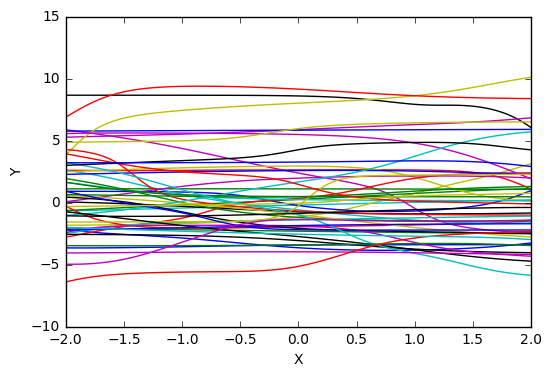

In [36]:
def pred_Y( w, a, b):
    Y = [ np.dot(w, np.tanh(a*(x-b)).T ) for x in X ]
    return Y

def pred_and_plot(A):
    Y_mlps = [ pred_Y(W[i], A[i], B[i]) for i in range(NO_MLPS) ]

    plt.xlabel('X')
    plt.ylabel('Y')

    for i in range(NO_MLPS):
        plt.plot(X, Y_mlps[i])
    return Y_mlps
# b)
A_2 = 2*np.random.randn(NO_MLPS,NO_HIDDEN_LAYERS) + 0
Y_A_2 = pred_and_plot(A_2)

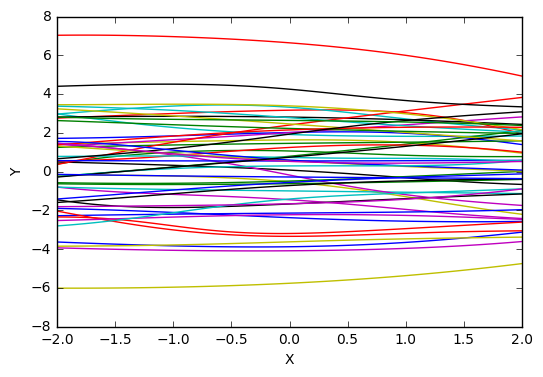

In [37]:
# c)
A_05 = 0.5*np.random.randn(NO_MLPS,NO_HIDDEN_LAYERS) + 0
Y_A_05 = pred_and_plot(A_05)

Average MSE for a ~ N(0,2) : 0.1933
Average MSE for a ~ N(0,0.5) : 0.0522


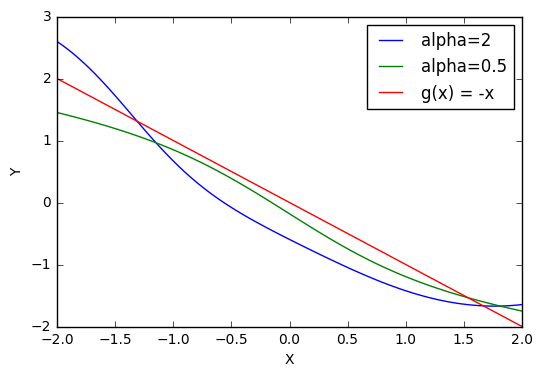

In [38]:
# d)
G_X = -X

mse_Y_A_2 = [ MSE(G_X, y) for y in Y_A_2 ]
mse_Y_A_05 = [ MSE(G_X, y) for y in Y_A_05 ]

best_A_2 = np.argmin(mse_Y_A_2)
best_A_05 = np.argmin(mse_Y_A_05)

print("Average MSE for a ~ N(0,2) : %2.4f" % mse_Y_A_2[best_A_2]  )
print("Average MSE for a ~ N(0,0.5) : %2.4f" % mse_Y_A_05[best_A_05] )

plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X, Y_A_2[best_A_2], label="alpha=2")
plt.plot(X, Y_A_05[best_A_05], label="alpha=0.5")
plt.plot(X, G_X, label="g(x) = -x")
plt.legend()
